# Exercise 4: Advection and diffusion of heat (20 points)

This week's exercise investigates how the advection and diffusion equations can be combined to simulate heat transfer in the Earth's crust.

### Tips for completing this exercise

- Use **exactly** the same variable names as in the instructions because your answers will be automatically graded, and the tests that grade your answers rely on following the same formatting or variable naming as in the instructions.
- **Please do not**:

    - **Change the file names**. Do all of your editing in the provided `Exercise-4-problems-1-2.ipynb` file (this file).
    - **Copy/paste cells in this notebook**. We use an automated grading system that will fail if there are copies of code cells.
    - **Change the existing cell types**. You can add cells, but changing the cell types for existing cells (from code to markdown, for example) will also cause the automated grader to fail.

## AI tool usage agreement

**Enter your name in the cell below** to confirm that you have followed the [course guidelines on the use of AI tools](https://introqg-site.readthedocs.io/en/latest/general-info/ai-tools.html) and understand that misuse of AI tools is considered cheating.

Name: Qi-fan Wu

## Problem 0: Mid-term course feedback (0 points)

Before starting this week's exercise, please take five minutes to share your thoughts about the course using the mid-term feedback form linked below. This feedback is very valuable for the future development of the course, and may even result in changes that can still be made in the coming weeks :D.

- Mid-term feedback form link: <https://elomake.helsinki.fi/lomakkeet/126815/lomake.html>

## Problem 1: Steady-state advection and diffusion (9 points)

Many equations involving a time term (e.g., $\frac{\partial T}{\partial t}$) can be solved for two different cases:

- **Steady state** $\left(\frac{\partial T}{\partial t} = 0\right)$: The solution that does not depend on time. This can be thought of as the solution that would be calculated after an infinite amount of time, or in which additional time would not change the solution. Time will not be part of the equation for calculating a solution in this case.
- **Time-dependent** $\left(\frac{\partial T}{\partial t} \ne 0\right)$: In this case the solution will contain a time term, and thus the solution will likely change as a function of time (it is possible that some time-dependent problems will reach a steady state after a long time). In other words, less or more time will generally (but not always) change the calculated result.

For simplicity, we will first consider heat transfer in the steady-state case. Thus, we will only calculate a "final" geotherm.

The derivation of the equation for calculating the steady-state geotherm for a constant temperature gradient at the surface can be found in the [lesson materials for Lesson 4](https://introqg-site.readthedocs.io/en/latest/lessons/L4/solving-advection.html). Please read through the details there to see how the advection and diffusion equations are combined and how the temperature equation is derived. As you will see, there are one or two boundary condition values needed to solve the heat transfer equation, depending on what you assume. In this case, the boundary conditions that are used are:

- A constant surface temperature of 0 °C
- A constant thermal gradient at the surface

The equation we will be using for our temperature $T$ calculation and the boundary conditions above is

$$
\large
T(z) = \frac{g \kappa}{v_{z}}\left(1 - \mathrm{e}^{-(v_{z} z/\kappa)} \right)
$$
*Equation 1. The steady-state heat transfer equation with a constant geothermal gradient at the surface.*

where $g$ is the geothermal gradient at the surface, $\kappa$ is the thermal diffusivity, $v_{z}$ is the advection velocity, and $z$ is the spatial coordinate (depth in this case).

In the following cells we will create a function for calculating temperatures using this equation and see how it works.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Creating a new function for calculating steady-state crustal temperatures
- Calculating crustal geotherms for different scenarios
- Plotting your results to display how the temperatures vary
- Including comments that explain what most lines in the code do
- Uploading your notebook to your GitHub repository for this week's exercise

### Part 0: Copying and testing your script file from Exercise 3 (0 points)

The first task in this problem is to copy your `introqg_functions.py` script file from Exercise 3 to the directory containing this notebook and then run the cell below to ensure it has been copied and is functioning as expected. Note: We will only check some of the functions in this file using the tests below, not all of them.

- Copy your `introqg_functions.py` script file from Exercise 3 to the directory containing this notebook
- Run the tests below

In [1]:
# The test below should work

from nose.tools import assert_equal
from introqg_functions import dodson

# Calculate some closure temperatures using Dodson's method
tc1 = dodson(
    cooling_rate=-2.0,
    activation_energy=138.0e3,
    diffusivity_inf=5.0e-3,
    grain_radius=100.0,
    geometry_factor=25
)
tc2 = dodson(
    cooling_rate=-15.0,
    activation_energy=168.0e3,
    diffusivity_inf=4.6e-5,
    grain_radius=100.0,
    geometry_factor=25
)
tc3 = dodson(
    cooling_rate=-5.0,
    activation_energy=264.0e3,
    diffusivity_inf=2.3e-4,
    grain_radius=500.0,
    geometry_factor=27
)

# Print calculated closure temperature
print(f"Calculated apatite (U-Th)/He closure temperature: {tc1:7.3f} °C")
print(f"Calculated zircon (U-Th)/He closure temperature:  {tc2:7.3f} °C")
print(f"Calculated muscovite Ar/Ar closure temperature:   {tc3:7.3f} °C")

# Check that the closure temperature values are correct
assert_equal(round(tc1, 3), 67.839)
assert_equal(round(tc2, 3), 202.924)
assert_equal(round(tc3, 3), 474.661)

# Print message if it is safe to continue
print("\nAll tests pass! You are ready to proceed with this exercise.")

Calculated apatite (U-Th)/He closure temperature:  67.839 °C
Calculated zircon (U-Th)/He closure temperature:  202.924 °C
Calculated muscovite Ar/Ar closure temperature:   474.661 °C

All tests pass! You are ready to proceed with this exercise.


### Part 1: Creating a steady-state geotherm function (3 points)

In order to proceed to exploring how the steady-state geotherm equation above works we first need to create a function to calculate temperatures. The new function should be called `steady_state_temp()` and it should calculate temperatures using Equation 1 above.

In the function, you will pass in the following values, and you should use the same name for the parameters in your `steady_state_temp()` function:

- `gradient` (units: °C / km)
- `diffusivity` (units: km<sup>2</sup> / Myr)
- `velocity` (units: km / Myr)
- `depths` (units: km)

**NOTE**: There is no need to convert units from the units listed above in your function. Distances in kilometers and time in millions of years (Myr) will work without conversion.

**What to do for this part:**

- Create a function called `steady_state_temp()` in your `introqg_functions.py` script file
    - Your function parameters should be `gradient`, `diffusivity`, `velocity`, and `depths` as described above

In [2]:
# Import your steady_state_temp function below
# YOUR CODE HERE
from introqg_functions import steady_state_temp
#raise NotImplementedError()

In [3]:
# The test below should work

# Import libraries we need
import numpy as np
from nose.tools import assert_equal
from introqg_functions import steady_state_temp

# Define range of depths to use
depth_array = np.linspace(0.0, 50.0, 51)

# Calculate temperatures using the steady_state_temp function
temperatures = steady_state_temp(
    gradient=20.0,
    diffusivity=32.0,
    velocity=1.0,
    depths=depth_array
)

# Print test temperature value
test_index1 = 10
print(f"Temperature at {depth_array[test_index1]} km depth: {temperatures[test_index1]:.3f} °C")

# Check that the temperature value is correct
assert_equal(round(temperatures[test_index1], 3), 171.766)

Temperature at 10.0 km depth: 171.766 °C


In [4]:
# The test below should work

# Print test temperature value
test_index2 = 23
print(f"Temperature at {depth_array[test_index2]} km depth: {temperatures[test_index2]:.3f} °C")

# Check that the temperature value is correct
assert_equal(round(temperatures[test_index2], 3), 328.089)

Temperature at 23.0 km depth: 328.089 °C


In [5]:
# The test below should work

# Define the new range of depths to use
depth_array = np.linspace(0.0, 40.0, 41)

# Calculate new temperatures using the steady_state_temp function
temperatures = steady_state_temp(
    gradient=20.0,
    diffusivity=32.0,
    velocity=0.5,
    depths=depth_array
)

# Print test temperature value
test_index3 = 40
print(f"Temperature at {depth_array[test_index3]} km depth: {temperatures[test_index3]:.3f} °C")

# Check that the temperature value is correct
assert_equal(round(temperatures[test_index3], 3), 594.865)

Temperature at 40.0 km depth: 594.865 °C


### Part 2: Calculating a geotherm (1 point)

Now that your `steady_state_temp` function is working, we can calcuate a first geotherm.

- Calculate the geotherm as the variable `geotherm1` using the following values:

    - A temperature gradient of 20.0 °C / km
    - A thermal diffusivity of 32.0 km$^{2}$ / Myr
    - An advection velocity of 0.75 km / Myr
    - A range of depth values from 0.0 to 40.0 in 81 steps

In [6]:
# Calculate your geotherm using your steady_state_temp function below

geotherm1 = None

# YOUR CODE HERE
# Define the range of depths, a range of depth values from 0.0 to 40.0 in 81 steps
depths = np.linspace(0.0, 40.0, 81)
# Calculate the geotherm
geotherm1 = steady_state_temp(
    gradient=20.0,      # Temperature gradient in °C / km
    diffusivity=32.0,   # Thermal diffusivity in km^2 / Myr
    velocity=0.75,      # Advection velocity in km / Myr
    depths=depths  # Array of depths in km
)
#raise NotImplementedError()

In [7]:
# The test below should work

# Print test temperature value
test_index1 = 9
test_index2 = 73
print(f"Temperature at index {test_index1:2} is {geotherm1[test_index1]:7.3f} °C. Expected value:  85.416 °C.")
print(f"Temperature at index {test_index2:2} is {geotherm1[test_index2]:7.3f} °C. Expected value: 490.595 °C.")


Temperature at index  9 is  85.416 °C. Expected value:  85.416 °C.
Temperature at index 73 is 490.595 °C. Expected value: 490.595 °C.


### Part 3: Plotting the geotherm (2 points)

Here we can create a plot of the geotherm calculated above.

- Using Matplotlib, create a line plot with temperature on the x-axis and depth on the y-axis
    - You can create the figure and plots using `fig, ax = plt.subplots(1, 1, figsize=(8, 6))`, which will create a figure with a single set of plot axes and a size of 8 inches wide by 6 inches tall
- Use the `ax.set_ylim()` function to ensure that depth increases downwards as it does in the Earth
    - *Hint*: The `ymin` and `ymax` values can be reversed to invert the y-axis
- Be sure to include axis labels and a title
- Also add a figure caption in the Markdown cell below the plot that describes it as if it was in a scientific journal article

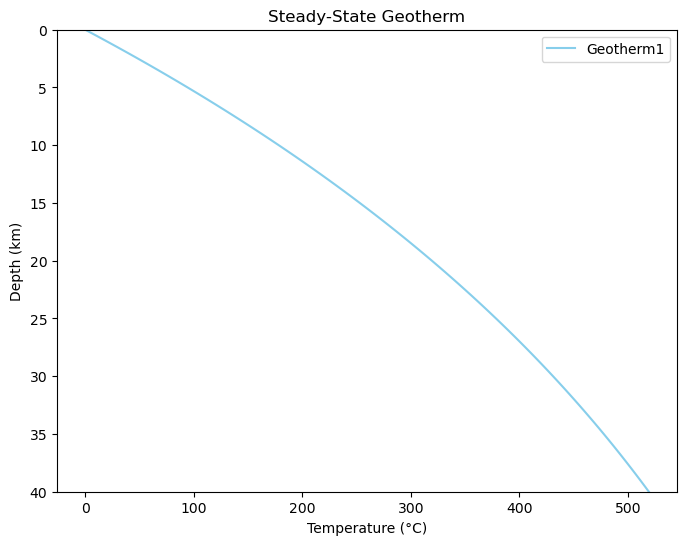

In [8]:
import matplotlib.pyplot as plt

# Create your plot below

# YOUR CODE HERE
import matplotlib.pyplot as plt
# plot the geotherm
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(geotherm1, depths, label='Geotherm1', color='skyblue')
# Invert y-axis to have depth increasing downwards
ax.set_ylim(max(depths), 0)
# Label the axes and add a title
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Depth (km)')
ax.set_title('Steady-State Geotherm')
# Show the legend
ax.legend()
# Display the plot
plt.show()
#raise NotImplementedError()

**Figure Caption:** Steady-state geotherm profile showing the increase in temperature with depth. The geotherm is calculated assuming a constant temperature gradient of 20.0 °C/km, a thermal diffusivity of 32.0 km²/Myr, and an advection velocity of 0.75 km/Myr. Depths range from 0 to 40 km. The plot demonstrates a typical steady-state condition where the temperature gradient is maintained constant over time, and the effects of advection and diffusion are balanced, with the temperature at the surface set to 0 °C and increasing steadily with depth due to geothermal heat.

### Part 4: Calculating and plotting another geotherm (3 points)

We can now repeat the steps in Part 2 and Part 3 to calculate and plot another geotherm.

**New geotherm**

- Calculate the geotherm as the variable `geotherm2` using the following values:

    - A temperature gradient of 20.0 °C / km
    - A thermal diffusivity of 32.0 km$^{2}$ / Myr
    - An advection velocity of 1.5 km / Myr
    - A range of depth values from 0.0 to 40.0 in 81 steps

**Plot**

- Using Matplotlib, create a line plot with the temperatures for `geotherm1` and `geotherm2` on the x-axis, and depth on the y-axis
    - You can create the figure and plots using `fig, ax = plt.subplots(1, 1, figsize=(8, 6))`, which will create a figure with a single set of plot axes and a size of 8 inches wide by 6 inches tall
- Use the `ax.set_ylim()` function to ensure that depth increases downwards as it does in the Earth
    - *Hint*: The `ymin` and `ymax` values can be reversed to invert the y-axis
- You should use the `label` parameter in the plot function to give the lines a label for the legend
- Be sure to display the legend, and include axis labels and a title
- Also add a figure caption in the Markdown cell below the plot that describes it as if it was in a scientific journal article

In [9]:
# Calculate your geotherm using your steady_state_temp function below

geotherm2 = None

# YOUR CODE HERE
# Calculate geotherm2
# Given values
gradient = 20.0  # Temperature gradient (°C/km)
diffusivity = 32.0  # Thermal diffusivity (km^2/Myr)
velocity = 1.5  # Advection velocity (km/Myr)
depths = np.linspace(0.0, 40.0, 81)  # Depths from 0 to 40 km
geotherm2 = steady_state_temp(
    gradient=gradient,
    diffusivity=diffusivity,
    velocity=velocity,
    depths=depths
)
#raise NotImplementedError()

In [10]:
# The test below should work

# Print test temperature value
test_index1 = 9
test_index2 = 73
print(f"Temperature at index {test_index1:2} is {geotherm2[test_index1]:7.3f} °C. Expected value:  81.141 °C.")
print(f"Temperature at index {test_index2:2} is {geotherm2[test_index2]:7.3f} °C. Expected value: 349.570 °C.")


Temperature at index  9 is  81.141 °C. Expected value:  81.141 °C.
Temperature at index 73 is 349.570 °C. Expected value: 349.570 °C.


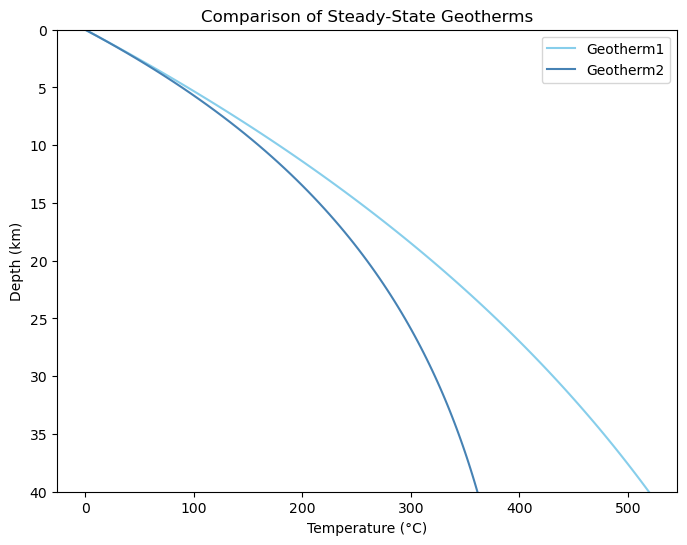

In [11]:
import matplotlib.pyplot as plt

# Create your plot below

# YOUR CODE HERE
# Plot geotherm1 and geotherm2
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(geotherm1, depths, label='Geotherm1', color='skyblue')
ax.plot(geotherm2, depths, label='Geotherm2', color='steelblue')
ax.set_ylim(max(depths), 0)  # Invert y-axis
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Depth (km)')
ax.set_title('Comparison of Steady-State Geotherms')
ax.legend()
plt.show()
#raise NotImplementedError()

**Figure Caption:** A comparison of two steady-state geotherm models illustrating the temperature distribution with depth in the Earth's crust. Geotherm1 represents the temperature profile calculated with an advection velocity of 0.75 km/Myr, whereas Geotherm2 represents a higher advection velocity of 1.5 km/Myr. The steeper slope of Geotherm2 indicates a more pronounced thermal effect due to the increased velocity of material transport, demonstrating the sensitivity of crustal temperatures to advective heat transfer processes. Both profiles were calculated assuming a constant surface temperature gradient of 20.0 °C/km and a thermal diffusivity of 32.0 km²/Myr.

## Problem 2: Time-dependent advection and diffusion (11 points)

In the second half of this exercise we will explore how temperatures in the crust vary with time. In this case, we solve the [same starting equation as in Problem 1](https://introqg-site.readthedocs.io/en/latest/lessons/L4/solving-advection.html), but include the time-dependent term $\frac{\partial T}{\partial t}$. This results in a more complicated solution for the temperature as shown below in Equation 2. The key differences between this new case and the steady-state solution are:

- Inclusion of time in the temperature calculation
- A starting temperature field that has a constant thermal gradient
- No boundary condition fixing the surface geothermal gradient to a constant value

These differences will result in some slightly different results than seen in Problem 1, which we will revisit in the reflection questions.

We will not go through the derivation of the equation used for calculating crustal temperature as a function of time, but you can find that equation below.

$$
\large
T(z,t) = G(z + v_{z} t) + \frac{G}{2} \left[ (z - v_{z} t) \mathrm{e}^{-v_{z} z / \kappa} \mathrm{erfc} \left( \frac{z - v_{z}t}{2 \sqrt{\kappa t}} \right) - (z + v_{z} t) \mathrm{erfc} \left( \frac{z + v_{z}t}{2 \sqrt{\kappa t}} \right) \right]
$$
*Equation 2. 1D time-dependent heat advection-diffusion equation.*

where $G$ is the initial geothermal gradient, $z$ is the spatial coordinate (depth in this case), $v_{z}$ is the advection velocity, $t$ is time, $\kappa$ is the thermal diffusivity, and $\mathrm{erfc}$ is the complementary error function. As you can already see, including time results in a much more complicated equation for temperature.

In the following cells we will create a function for calculating temperatures using this equation and see how it works.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Creating a new function for calculating time-dependent crustal temperatures
- Calculating crustal geotherms for different scenarios
- Plotting your results to display how the temperatures vary
- Including comments that explain what most lines in the code do
- Uploading your notebook to your GitHub repository for this week's exercise

### Part 1: Creating a time-dependent geotherm function (3 points)

As was the case in Problem 1, we need to first create a function to calculate temperatures in order to investigate how Equation 2 works. In this case, the new function should be called `transient_temp()` and it should calculate  temperatures using Equation 2 above. Transient is the word that is often used to indicate something is changing with time, such as temperature in our case.

In the function, you will pass in the following values, and you should use the same name for the parameters in your `transient_temp()` function:

- `initial_gradient` (units: °C / km)
- `diffusivity` (units: km<sup>2</sup> / Myr)
- `velocity` (units: km / Myr)
- `depths` (units: km)
- `time` (units: Myr)

**Hints**

1. You will need to import the `erfc` function at the start of your `introqg_functions.py` script file. You can add a line that reads `from scipy.special import erfc`.
2. Again, you do not need to convert units to SI units in your function. You can pass values with the units listed above.

**What to do for this part:**

- Create a function called `transient_temp()` in your `introqg_functions.py` script file
    - Your function parameters should be `gradient`, `diffusivity`, `velocity`, `depths`, and `time` as described above

In [12]:
# Import your transient_temp function below

# YOUR CODE HERE
from introqg_functions import transient_temp
!pip install scipy
from scipy.special import erfc
#raise NotImplementedError()

In [13]:
# The test below should work

# Import libraries we need
import numpy as np
from nose.tools import assert_equal
from introqg_functions import transient_temp

# Define range of depths to use
depth_array = np.linspace(0.0, 50.0, 51)

# Define test time
test_time1 = 10.0

# Calculate temperatures using the steady_state_temp function
temperatures = transient_temp(
    initial_gradient=20.0,
    diffusivity=32.0,
    velocity=1.0,
    depths=depth_array,
    time=test_time1
)

# Print test temperature value
test_index1 = 10
print(f"Temperature at {depth_array[test_index1]} km depth after {test_time1} Myr: {temperatures[test_index1]:.3f} °C")

# Check that the temperature value is correct
assert_equal(round(temperatures[test_index1], 3), 314.161)

Temperature at 10.0 km depth after 10.0 Myr: 314.161 °C


In [14]:
# The test below should work

# Print test temperature value
test_index2 = 37
print(f"Temperature at {depth_array[test_index2]} km depth after {test_time1} Myr: {temperatures[test_index2]:.3f} °C")

# Check that the temperature value is correct
assert_equal(round(temperatures[test_index2], 3), 934.585)

Temperature at 37.0 km depth after 10.0 Myr: 934.585 °C


In [15]:
# The test below should work

# Define new test time
test_time2 = 5.0

# Calculate temperatures using the steady_state_temp function
temperatures = transient_temp(
    initial_gradient=20.0,
    diffusivity=32.0,
    velocity=0.5,
    depths=depth_array,
    time=test_time2
)

# Print test temperature value
test_index3 = 23
print(f"Temperature at {depth_array[test_index3]} km depth after {test_time2} Myr: {temperatures[test_index3]:.3f} °C")

# Check that the temperature value is correct
assert_equal(round(temperatures[test_index3], 3), 506.762)

Temperature at 23.0 km depth after 5.0 Myr: 506.762 °C


### Part 2: Calculating a geotherm (1 point)

Now that your `transient_temp` function is working, we can calcuate a time-dependent geotherm using it.

- Calculate the geotherm as the variable `geotherm3` using the following values:

    - An initial temperature gradient of 20.0 °C / km
    - A thermal diffusivity of 32.0 km$^{2}$ / Myr
    - An advection velocity of 0.75 km / Myr
    - A range of depth values from 0.0 to 40.0 in 81 steps
    - A time of 10.0 Myr

In [16]:
# Calculate your geotherm using your steady_state_temp function below

geotherm3 = None

# YOUR CODE HERE
# Given values
initial_gradient = 20.0  # °C/km
diffusivity = 32.0  # km^2/Myr
velocity = 0.75  # km/Myr
time = 10.0  # Myr
depths = np.linspace(0.0, 40.0, 81)  # Depth array from 0.0 to 40.0 km in 81 steps

# Calculate the time-dependent geotherm
geotherm3 = transient_temp(
    initial_gradient=initial_gradient,
    diffusivity=diffusivity,
    velocity=velocity,
    depths=depths,
    time=time
)
print(geotherm3)
#raise NotImplementedError()

[  0.          15.5877003   30.99638304  46.2306877   61.29516862
  76.19429567  90.93245495 105.51394951 119.94300007 134.22374572
 148.36024463 162.35647485 176.21633496 189.94364488 203.54214662
 217.015505   230.3673085  243.60106996 256.72022743 269.72814493
 282.62811328 295.4233509  308.11700464 320.71215063 333.21179507
 345.61887513 357.93625977 370.16675063 382.31308289 394.37792614
 406.36388526 418.27350134 430.10925254 441.87355503 453.56876386
 465.19717392 476.7610208  488.26248176 499.70367665 511.08666881
 522.41346602 533.68602145 544.90623459 556.07595215 567.19696906
 578.27102936 589.29982718 600.28500764 611.2281678  622.13085763
 632.99458089 643.82079611 654.61091746 665.36631575 676.08831929
 686.77821485 697.43724851 708.06662665 718.66751677 729.24104845
 739.78831416 750.31037023 760.80823765 771.28290295 781.7353191
 792.16640627 802.57705275 812.96811572 823.34042211 833.69476938
 844.0319263  854.35263378 864.65760562 874.94752926 885.22306656
 895.484854

In [17]:
# The test below should work

# Print test temperature value
test_index1 = 9
test_index2 = 73
print(f"Temperature at index {test_index1:2} is {geotherm3[test_index1]:7.3f} °C. Expected value: 134.224 °C.")
print(f"Temperature at index {test_index2:2} is {geotherm3[test_index2]:7.3f} °C. Expected value: 874.948 °C.")


Temperature at index  9 is 134.224 °C. Expected value: 134.224 °C.
Temperature at index 73 is 874.948 °C. Expected value: 874.948 °C.


### Part 3: Plotting the geotherm, again (2 points)

Next we can create a plot of the transient geotherm calculated above.

- Using Matplotlib, create a line plot with the temperature on the x-axis and depth on the y-axis
    - You can create the figure and plots using `fig, ax = plt.subplots(1, 1, figsize=(8, 6))`, which will create a figure with a single set of plot axes and a size of 8 inches wide by 6 inches tall
- Use the `ax.set_ylim()` function to ensure that depth increases downwards as it does in the Earth
    - *Hint*: The `ymin` and `ymax` values can be reversed to invert the y-axis
- Be sure to include axis labels and a title
- Also add a figure caption in the Markdown cell below the plot that describes it as if it was in a scientific journal article

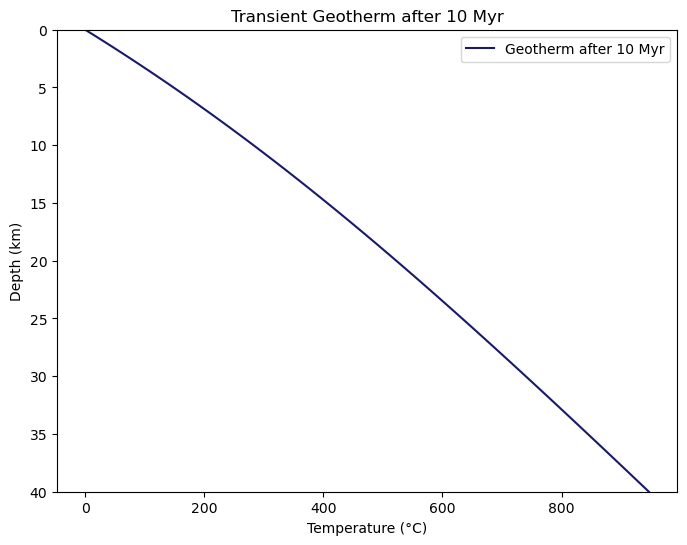

In [18]:
import matplotlib.pyplot as plt

# Create your plot below

# YOUR CODE HERE
import matplotlib.pyplot as plt
# Create the figure and axes for the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Plotting the transient geotherm
ax.plot(geotherm3, depths, color='midnightblue', label='Geotherm after 10 Myr')
# Invert y-axis to have depth increasing downwards
ax.set_ylim(max(depths), min(depths))
# Adding labels and title
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Depth (km)')
ax.set_title('Transient Geotherm after 10 Myr')
# Show the legend
ax.legend()
# Display the plot
plt.show()
#raise NotImplementedError()

**Figure Caption:** Transient geotherm profile after 10 million years, illustrating the evolution of temperature with depth in the Earth's crust. The geotherm is determined by the interplay of heat advection and diffusion processes, assuming an initial geothermal gradient of 20 °C/km, a thermal diffusivity of 32 km²/Myr, and an advection velocity of 0.75 km/Myr. The plot shows that temperature increases with depth, reflecting the conductive and advective heat transfer mechanisms in the crust over geological timescales.

### Part 4: Calculating and plotting another transient geotherm (3 points)

We can now again repeat the steps in Part 2 and Part 3 of Problem 2 to calculate and plot another geotherm.

**New geotherm**

- Calculate the geotherm as the variable `geotherm4` using the following values:

    - An initial temperature gradient of 20.0 °C / km
    - A thermal diffusivity of 32.0 km$^{2}$ / Myr
    - An advection velocity of 1.5 km / Myr
    - A range of depth values from 0.0 to 40.0 in 81 steps
    - A time of 10.0 Myr

**Plot**

- Using Matplotlib, create a line plot with the temperatures for `geotherm3` and `geotherm4` on the x-axis, and depth on the y-axis
    - You can create the figure and plots using `fig, ax = plt.subplots(1, 1, figsize=(8, 6))`, which will create a figure with a single set of plot axes and a size of 8 inches wide by 6 inches tall
- Use the `ax.set_ylim()` function to ensure that depth increases downwards as it does in the Earth
    - *Hint*: The `ymin` and `ymax` values can be reversed to invert the y-axis
- You should use the `label` parameter in the plot function to give the lines a label for the legend
- Be sure to display the legend, and include axis labels and a title
- Also add a figure caption in the Markdown cell below the plot that describes it as if it was in a scientific journal article

In [19]:
# Calculate your geotherm using your steady_state_temp function below

geotherm4 = None

# YOUR CODE HERE
# Given parameters for geotherm4
initial_gradient = 20.0  # °C/km
diffusivity = 32.0       # km^2/Myr
velocity = 1.5           # km/Myr
time = 10.0              # Myr
depths = np.linspace(0.0, 40.0, 81)  # Depth array from 0 to 40 km in 81 steps

# Calculate geotherm4 using the transient_temp function
geotherm4 = transient_temp(
    initial_gradient=initial_gradient,
    diffusivity=diffusivity,
    velocity=velocity,
    depths=depths,
    time=time
)
#raise NotImplementedError()

In [20]:
# The test below should work

# Print test temperature value
test_index1 = 9
test_index2 = 73
print(f"Temperature at index {test_index1:2} is {geotherm4[test_index1]:8.3f} °C. Expected value:  191.637 °C.")
print(f"Temperature at index {test_index2:2} is {geotherm4[test_index2]:8.3f} °C. Expected value: 1023.845 °C.")


Temperature at index  9 is  191.637 °C. Expected value:  191.637 °C.
Temperature at index 73 is 1023.845 °C. Expected value: 1023.845 °C.


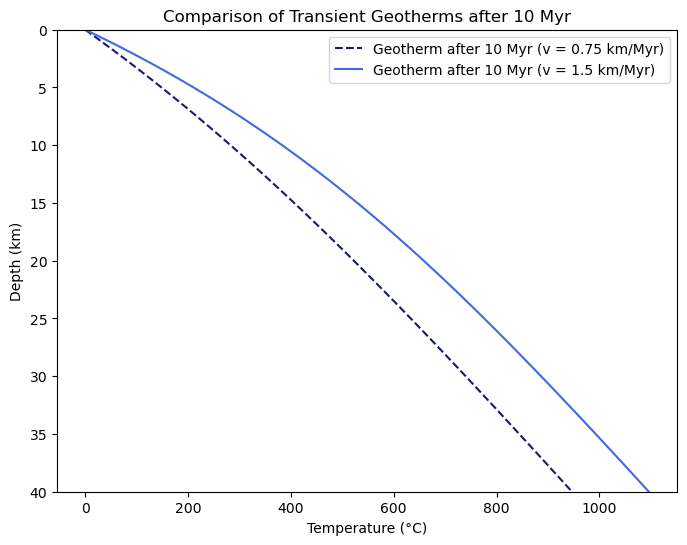

In [21]:
import matplotlib.pyplot as plt

# Create your plot below

# YOUR CODE HERE
# Plotting the geotherms
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(geotherm3, depths, label='Geotherm after 10 Myr (v = 0.75 km/Myr)', linestyle='--', color='midnightblue')
ax.plot(geotherm4, depths, label='Geotherm after 10 Myr (v = 1.5 km/Myr)', linestyle='-', color='royalblue')
ax.set_ylim(max(depths), 0)  # Invert y-axis
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Depth (km)')
ax.set_title('Comparison of Transient Geotherms after 10 Myr')
ax.legend()
plt.show()
#raise NotImplementedError()

**Figure Caption:** The plot illustrates a comparison between two transient geotherms evaluated after 10 million years (Myr) for different advection velocities. The dashed line represents the geotherm for an advection velocity of 0.75 km/Myr, whereas the solid line corresponds to an advection velocity of 1.5 km/Myr. Both geotherms start with an initial temperature gradient of 20°C/km and assume a thermal diffusivity of 32 km²/Myr. The geotherms display the expected increase in temperature with depth, with the higher advection velocity resulting in a steeper temperature gradient, indicating more rapid heat transport from the deeper parts of the crust.

### Part 5: One final plot (2 points)

Lastly, we can now plot all four geotherms we have calculated up to this point to be able to compare them.

- Using Matplotlib, create a line plot with the temperatures for `geotherm1`, `geotherm2`, `geotherm3`, and `geotherm4` on the x-axis, and depth on the y-axis
    - You can create the figure and plots using `fig, ax = plt.subplots(1, 1, figsize=(8, 6))`, which will create a figure with a single set of plot axes and a size of 8 inches wide by 6 inches tall
    - Use a dashed line pattern for `geotherm1` and `geotherm2`
- Use the `ax.set_ylim()` function to ensure that depth increases downwards as it does in the Earth
    - *Hint*: The `ymin` and `ymax` values can be reversed to invert the y-axis
- You should use the `label` parameter in the plot function to give the lines a label for the legend
    - Be sure the line labels provide enough information to tell which model and parameters were used to calculate the line temperatures
- Be sure to display the legend, and include axis labels and a title
- Also add a figure caption in the Markdown cell below the plot that describes it as if it was in a scientific journal article
print(len(geotherm1), len(depth_array))
**NOTE**: You should to use the "Kernel -> Restart & Run All" option to ensure the correct values for each geotherm are stored in memory.

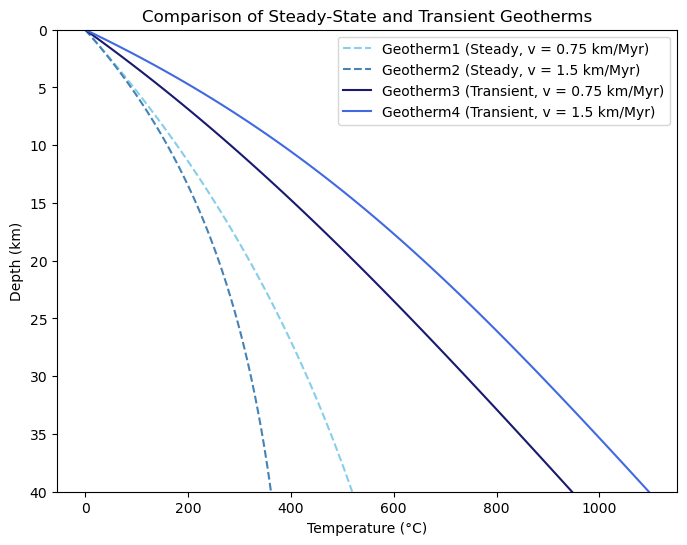

In [23]:
import matplotlib.pyplot as plt

# Create your plot below

# YOUR CODE HERE
# Create the figure and axes for the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
depths = np.linspace(0.0, 40.0, 81)  # Depth array from 0 to 40 km in 81 steps
# Plot each geotherm with appropriate labeling
# Ensure the correct value for each geotherm are stored in the memory
ax.plot(geotherm1, depths, label='Geotherm1 (Steady, v = 0.75 km/Myr)', linestyle='--', color='skyblue')
ax.plot(geotherm2, depths, label='Geotherm2 (Steady, v = 1.5 km/Myr)', linestyle='--', color='steelblue')
ax.plot(geotherm3, depths, label='Geotherm3 (Transient, v = 0.75 km/Myr)', linestyle='-', color='midnightblue')
ax.plot(geotherm4, depths, label='Geotherm4 (Transient, v = 1.5 km/Myr)', linestyle='-', color='royalblue')
# Invert y-axis to have depth increasing downwards
ax.set_ylim(max(depths), 0)
# Label the axes and add a title
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Depth (km)')
ax.set_title('Comparison of Steady-State and Transient Geotherms')
# Show the legend
ax.legend()
# Display the plot
plt.show()
#raise NotImplementedError()

**Figure Caption:** This figure illustrates a comparison of steady-state and transient geotherms for a crustal profile. Geotherm1 and Geotherm2 are calculated under steady-state conditions with advection velocities of 0.75 km/Myr and 1.5 km/Myr respectively and are represented by dashed lines. Geotherm3 and Geotherm4 represent transient state conditions after 10 million years (Myr) with the same respective velocities indicated by solid lines. The geotherms show how temperature increases with depth and how higher advection velocities result in steeper temperature gradients, demonstrating the combined effects of thermal diffusion and advection on crustal temperature distribution over time.

## Optional reflection questions (0 points)

We invite you to consider the following questions. Please answer them briefly in the Markdown cell below.

1. Is the difference between a steady-state and transient calculation clear? If not, what do you find to be confusing?
2. Based on the lecture slides, how did you expect temperatures in the crust to change when the advection velocity was increased? What did you observe for the steady-state and transient cases?
3. In the last figure (Figure 5) you see different behaviors for the steady-state and transient temperature calculations. This relates to the boundary conditions that are applied in solving both types of equation. How do you think the boundary conditions are impacting the calculated temperatures?

YOUR ANSWER HERE